# Selenium

## Weather Info Crawler
Daily Weather Information:
- Temperature (°F) - only Avg metric
- Dew Point (°F) - only Avg metric
- Humidity (%) - only Avg metric
- Wind Speed (mph) - only Avg metric
- Pressure (in) - only Avg metric
- Precipitation (in) - only Avg metric
- date

In [1]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as BS
from selenium import webdriver
from functools import reduce
import pandas as pd
import time
import csv

The function belew will setup a selenium webdriver with the path to firefox browser as an option and the driver as an executable path. Then the driver gets the whole page specified in the `url` variable. The driver is then closed and the webpage is returned. 

In [2]:
def render_page(url):
    options = Options()
    options.binary_location = r'C:/Program Files/Mozilla Firefox/firefox.exe'
    driver = webdriver.Firefox(executable_path=r'C:/Users/J/Desktop/MS.c/DataAnalytics/DA_Homework/HW2/geckodriver.exe',\
                               options=options)
    
    driver.get(url)
    time.sleep(6)
    r = driver.page_source
    driver.quit()
    return r

The `save_csv` function, saves a dataframe to a path with a given name. This function will be used to save the weather information table of each month.

In [9]:
def save_csv(df, filename):
    df.to_csv(filename, encoding='utf-8', index=False)
    return

Funtion belew does the main task. Reciving a fixed url and a list of dates, it dirst builds the actual url and calls `render_page`. The page is returned and `beautifulsoup` is used to parse the html content. The [Wunderground website](https://www.wunderground.com/) has certain protections that will not let in a connection via the beautifulsoup library. However, there is no limit to parse the html content derived from the website with beautifulsoup. Weather information table is then found and its body is saved to iterate through. Each column group is saved seperately and within each column group, the 3 values(max, avg, max) are stored together in a `tr` tag. 
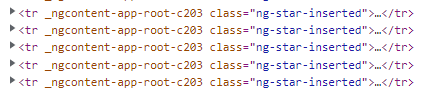

Within each `tr` tag, there are `td` tags that contain the values. 
<table><tr>
<td> <img src="pictures/td.PNG" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="pictures/data.PNG" alt="Drawing" style="width: 200px;height: 250px;"/> </td>
</tr></table>

So the iteration is on all the `tr` tags in the table, saving all the values in order in a list in. Then the values of each desired column is obtained with specifying an index range. The weather information tables for each month, also contain the information of the first day of the next month, so this row should be eliminated. The way of indexing each column is different according to the number of days in that month. Therefore there must be 4 different indexing methods for 31, 30, 29 and 28 days(an extra date is also needed for the 1st of the next month). The index range of desired columns(average values, date and precipitation) are found and saved in a dataframe. Next, the `Date` column is transformed to datetime format and the merged dataframe is passed to `save_csv` to be saved. 

In [5]:
def scraper(page, dates):

        for d in dates:
            output = pd.DataFrame()

            url = str(str(page) + str(d))

            r = render_page(url)

            soup = BS(r, "html.parser")
            container = soup.find('lib-city-history-observation')
            check = container.find('tbody')

            data = []

            for c in check.find_all('tr', class_='ng-star-inserted'):
                for i in c.find_all('td', class_='ng-star-inserted'):
                    trial = i.text
                    trial = trial.strip('  ')
                    data.append(trial)

            if round(len(data) / 17 - 1) == 32:
                Temperature = pd.DataFrame([data[33:129][x:x + 1] for x in range(1, len(data[33:129]), 3)][1:],
                                           columns=['Temp_avg'])
                Dew_Point = pd.DataFrame([data[132:227][x:x + 1] for x in range(1, len(data[132:227]), 3)][1:],
                                         columns=['Dew_avg'])
                Humidity = pd.DataFrame([data[231:327][x:x + 1] for x in range(1, len(data[231:327]), 3)][1:],
                                        columns=['Hum_avg'])
                Wind = pd.DataFrame([data[330:426][x:x + 1] for x in range(1, len(data[330:426]), 3)][1:],
                                    columns=['Wind_avg'])
                Pressure = pd.DataFrame([data[429:524][x:x + 1] for x in range(1, len(data[429:524]), 3)][1:],
                                        columns=['Pres_avg'])
                Date = pd.DataFrame(data[:32][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[528:560][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 29:
                Temperature = pd.DataFrame([data[30:117][x:x + 1] for x in range(1, len(data[30:117]), 3)][1:],
                                           columns=['Temp_avg'])
                Dew_Point = pd.DataFrame([data[120:207][x:x + 1] for x in range(1, len(data[120:207]), 3)][1:],
                                         columns=['Dew_avg'])
                Humidity = pd.DataFrame([data[210:297][x:x + 1] for x in range(1, len(data[210:297]), 3)][1:],
                                        columns=['Hum_avg'])
                Wind = pd.DataFrame([data[300:387][x:x + 1] for x in range(1, len(data[300:387]), 3)][1:],
                                    columns=['Wind_avg'])
                Pressure = pd.DataFrame([data[390:477][x:x + 1] for x in range(1, len(data[390:477]), 3)][1:],
                                        columns=['Pres_avg'])
                Date = pd.DataFrame(data[:29][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:489][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 30:
                Temperature = pd.DataFrame([data[30:120][x:x + 1] for x in range(1, len(data[30:120]), 3)][1:],
                                           columns=['Temp_avg'])
                Dew_Point = pd.DataFrame([data[120:210][x:x + 1] for x in range(1, len(data[120:210]), 3)][1:],
                                         columns=['Dew_avg'])
                Humidity = pd.DataFrame([data[210:300][x:x + 1] for x in range(1, len(data[210:300]), 3)][1:],
                                        columns=['Hum_avg'])
                Wind = pd.DataFrame([data[300:390][x:x + 1] for x in range(1, len(data[300:390]), 3)][1:],
                                    columns=['Wind_avg'])
                Pressure = pd.DataFrame([data[390:480][x:x + 1] for x in range(1, len(data[390:480]), 3)][1:],
                                        columns=['Pres_avg'])
                Date = pd.DataFrame(data[:30][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 31:
                Temperature = pd.DataFrame([data[32:125][x:x + 1] for x in range(1, len(data[32:125]), 3)][1:],
                                           columns=['Temp_avg'])
                Dew_Point = pd.DataFrame([data[128:221][x:x + 1] for x in range(1, len(data[128:221]), 3)][1:],
                                         columns=['Dew_avg'])
                Humidity = pd.DataFrame([data[224:317][x:x + 1] for x in range(1, len(data[224:317]), 3)][1:],
                                        columns=['Hum_avg'])
                Wind = pd.DataFrame([data[320:413][x:x + 1] for x in range(1, len(data[320:413]), 3)][1:],
                                    columns=['Wind_avg'])
                Pressure = pd.DataFrame([data[416:509][x:x + 1] for x in range(1, len(data[416:509]), 3)][1:],
                                        columns=['Pres_avg'])
                Date = pd.DataFrame(data[:31][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[512:543][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            else:
                print('Data not in normal length')

            dfs = [Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation]

            df_final = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

            df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)

            output = output.append(df_final)
            output = output[['Date','Temp_avg','Dew_avg','Hum_avg','Wind_avg','Pres_avg','Precipitation']]
            output.set_index(['Date'])
            
            save_csv(output, "Wweather-" + str(d) + ".csv")

        print('Scraper done!')
        
        

        return

A set of dates is prepared and `scraper` is called for the dates.

(Due to internet problems, this section was done in 3 tries, each for a subset of dates. The last and compeleting try was for 2 months. That is why there is only these 2 monthes in the output.)

In [20]:
dates = ['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', \
         '2021-07', '2021-08', '2021-09','2021-10', '2021-11', '2021-12', ]
page = 'https://www.wunderground.com/history/monthly/us/va/arlington/KDCA/date/'
scraper(page,dates)

C:\Users\J\AppData\Local\Temp\ipykernel_10204\1137324757.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=r'C:/Users/J/Desktop/MS.c/DataAnalytics/DA_Homework/HW2/geckodriver.exe',\


2021-09 finished!


C:\Users\J\AppData\Local\Temp\ipykernel_10204\1424846797.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(df_final)
C:\Users\J\AppData\Local\Temp\ipykernel_10204\1137324757.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=r'C:/Users/J/Desktop/MS.c/DataAnalytics/DA_Homework/HW2/geckodriver.exe',\


2021-10 finished!
Scraper done!


C:\Users\J\AppData\Local\Temp\ipykernel_10204\1424846797.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(df_final)


## Download Capitalbikeshare Data
You can write script for download and extracting files or do it <b>manualy</b>.

## Part 1: Merge Weather Info Dataframes

The dataframes were all saved within a directory. Iterating through that directory and reading the csv files in order and concatinating them together in a loop, will give the full dataset. The `Date` column is then set as the index of the final dataset. 

In [23]:
import os

directory = 'data2/weather'
weather_df = pd.DataFrame()

for file_ in (os.listdir(directory)):
    df = pd.read_csv(directory + '/' + file_)
    weather_df = pd.concat([weather_df, df], ignore_index=True, sort=False)
    
weather_df = weather_df.set_index('Date')

In [24]:
weather_df

,Temp_avg,Dew_avg,Hum_avg,Wind_avg,Pres_avg,Precipitation
Date,,,,,,
2021-01-1,37.4,32.2,82.6,7.8,30.3,0.00
2021-01-2,43.8,38.5,83.4,7.0,30.0,0.81
2021-01-3,40.5,37.4,89.1,7.8,30.0,0.19
2021-01-4,40.4,34.3,79.9,5.9,30.0,0.09
2021-01-5,40.9,35.2,80.5,6.9,29.9,0.00
...,...,...,...,...,...,...
2021-12-27,41.3,31.0,67.0,6.5,30.0,0.00
2021-12-28,48.2,32.8,59.2,4.5,29.9,0.00
2021-12-29,50.2,40.5,70.1,5.0,29.8,0.00


## Part 2: Merge Capitalbikeshare Dataframes

The same approach as above is taken for this part. 

In [25]:
import os

directory2 = 'data2/bike'
bike_df = pd.DataFrame()

for file_ in (os.listdir(directory2)):
    df = pd.read_csv(directory2 + '/' + file_)
    bike_df = pd.concat([bike_df, df], ignore_index=True, sort=False)

C:\Users\J\AppData\Local\Temp\ipykernel_10204\4167673636.py:7: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(directory2 + '/' + file_)


In [26]:
bike_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,13A48BD20CC3DD85,classic_bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318.0,Georgia Ave & Emerson St NW,31405.0,38.947156,-77.065115,38.949662,-77.027333,casual
1,CA68C580B32EEE66,electric_bike,2021-01-08 22:05:51,2021-01-08 22:23:52,8th & D St NW,31270.0,14th & D St SE,31663.0,38.894804,-77.023091,38.884053,-76.986043,member
2,5A925307814D5C2B,classic_bike,2021-01-21 17:20:31,2021-01-21 17:23:24,Wilson Blvd. & N. Vermont St.,31926.0,George Mason Dr & Wilson Blvd,31036.0,38.879477,-77.114563,38.878870,-77.120700,member
3,B6B2DB54A2B233EE,classic_bike,2021-01-28 10:06:30,2021-01-28 10:20:54,Franklin St & S Washington St,31907.0,Braddock Rd Metro,31047.0,38.798133,-77.048700,38.814577,-77.052808,member
4,921A142D5C8A9759,classic_bike,2021-01-11 12:09:45,2021-01-11 12:20:15,St. Asaph & Montgomery St,31931.0,Braddock Rd Metro,31047.0,38.814185,-77.043809,38.814577,-77.052808,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749876,8C999F60CA429723,classic_bike,2021-12-15 18:26:44,2021-12-15 18:34:25,14th & Belmont St NW,31119.0,14th & Rhode Island Ave NW,31203.0,38.921074,-77.031887,38.908600,-77.032300,casual
2749877,CA9B6486BDC1D25A,electric_bike,2021-12-15 00:45:55,2021-12-15 00:49:46,14th & Belmont St NW,31119.0,14th & Irving St NW,31124.0,38.920981,-77.031653,38.928552,-77.032224,casual
2749878,95957793A0807E8B,classic_bike,2021-12-06 14:17:45,2021-12-06 14:29:26,15th & P St NW,31201.0,14th & Irving St NW,31124.0,38.909801,-77.034427,38.928552,-77.032224,member
2749879,99DA9A8F72185C79,docked_bike,2021-12-29 14:59:01,2021-12-29 16:29:40,10th St & L'Enfant Plaza SW,31287.0,10th St & L'Enfant Plaza SW,31287.0,38.884323,-77.026010,38.884323,-77.026010,casual


## Part 3: Data Cleaning

The `dropna` method is used to eliminate rows that contain a `NaN` value. With specifying `axis=0` it will be looking at rows and specifying `how='any'` will eliminate rows that contain at least one `NaN` value. 

In [27]:
#a
bike_df.dropna(axis=0, how='any', inplace=True)

Columns `started_at` and `ended_at` will first be turned into datetime data type. Each cell that does not follow the format given, will be filled with `NaN` as the `errors` argument is specified as `coerce`. Then again, rows with at least one `NaN` value will be eliminated. 

In [28]:
#b2021-01-08 17:58:48
bike_df['started_at'] = pd.to_datetime(bike_df['started_at'], format='%Y/%m/%d %H:%M:%S', errors='coerce')
bike_df['ended_at'] = pd.to_datetime(bike_df['ended_at'], format='%Y/%m/%d %H:%M:%S', errors='coerce')
bike_df.dropna(axis=0, how='any', inplace=True)

The values of year, month and day of each row for `started_at` and `ended_at` are compared and only the ones that are equal(trip begind and ends on the same day) are kept. 

In [29]:
#c
from datetime import datetime as dt
bike_df = bike_df.loc[(bike_df['started_at'].dt.strftime("%Y") == bike_df['ended_at'].dt.strftime("%Y")) & \
            (bike_df['started_at'].dt.strftime("%m") == bike_df['ended_at'].dt.strftime("%m")) & \
            (bike_df['started_at'].dt.strftime("%d") == bike_df['ended_at'].dt.strftime("%d"))]

In [30]:
bike_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,13A48BD20CC3DD85,classic_bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318.0,Georgia Ave & Emerson St NW,31405.0,38.947156,-77.065115,38.949662,-77.027333,casual
1,CA68C580B32EEE66,electric_bike,2021-01-08 22:05:51,2021-01-08 22:23:52,8th & D St NW,31270.0,14th & D St SE,31663.0,38.894804,-77.023091,38.884053,-76.986043,member
2,5A925307814D5C2B,classic_bike,2021-01-21 17:20:31,2021-01-21 17:23:24,Wilson Blvd. & N. Vermont St.,31926.0,George Mason Dr & Wilson Blvd,31036.0,38.879477,-77.114563,38.878870,-77.120700,member
3,B6B2DB54A2B233EE,classic_bike,2021-01-28 10:06:30,2021-01-28 10:20:54,Franklin St & S Washington St,31907.0,Braddock Rd Metro,31047.0,38.798133,-77.048700,38.814577,-77.052808,member
4,921A142D5C8A9759,classic_bike,2021-01-11 12:09:45,2021-01-11 12:20:15,St. Asaph & Montgomery St,31931.0,Braddock Rd Metro,31047.0,38.814185,-77.043809,38.814577,-77.052808,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749876,8C999F60CA429723,classic_bike,2021-12-15 18:26:44,2021-12-15 18:34:25,14th & Belmont St NW,31119.0,14th & Rhode Island Ave NW,31203.0,38.921074,-77.031887,38.908600,-77.032300,casual
2749877,CA9B6486BDC1D25A,electric_bike,2021-12-15 00:45:55,2021-12-15 00:49:46,14th & Belmont St NW,31119.0,14th & Irving St NW,31124.0,38.920981,-77.031653,38.928552,-77.032224,casual
2749878,95957793A0807E8B,classic_bike,2021-12-06 14:17:45,2021-12-06 14:29:26,15th & P St NW,31201.0,14th & Irving St NW,31124.0,38.909801,-77.034427,38.928552,-77.032224,member
2749879,99DA9A8F72185C79,docked_bike,2021-12-29 14:59:01,2021-12-29 16:29:40,10th St & L'Enfant Plaza SW,31287.0,10th St & L'Enfant Plaza SW,31287.0,38.884323,-77.026010,38.884323,-77.026010,casual


## Part4: Merging dataframes on date

In order to merge the dataframes, the date is extracted from `started_at` and saved to a new column. The type is then turned to `datetime`. A new index column is given to the weather dataframe and the `Date` index is turned to `datetime` type. The `merge` function is used to join the dataframes on the `Date` column. 

In [46]:
bike_df['Date'] = bike_df['started_at'].dt.date
bike_df['Date']= pd.to_datetime(bike_df['Date'])

weather_df = weather_df.reset_index()
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

weather_bike_df = weather_df.merge(bike_df, on='Date')
weather_bike_df

,Date,Temp_avg,Dew_avg,Hum_avg,Wind_avg,Pres_avg,Precipitation,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,2021-01-01,37.4,32.2,82.6,7.8,30.3,0.00,AC4DC4B97FC7E956,classic_bike,2021-01-01 10:59:13,2021-01-01 11:05:50,15th & W St NW,31125.0,Thomas Circle,31241.0,38.919018,-77.034449,38.905900,-77.032500,member
1,2021-01-01,37.4,32.2,82.6,7.8,30.3,0.00,D0BF15B946A6703D,electric_bike,2021-01-01 08:22:52,2021-01-01 08:28:19,18th St & Rhode Island Ave NE,31510.0,Rhode Island Ave Metro,31516.0,38.926957,-76.978950,38.920668,-76.995774,member
2,2021-01-01,37.4,32.2,82.6,7.8,30.3,0.00,DCCF53F78D442569,docked_bike,2021-01-01 15:12:02,2021-01-01 15:40:48,1st & M St NE,31603.0,Constitution Ave & 2nd St NW/DOL,31271.0,38.905697,-77.005483,38.892275,-77.013917,casual
3,2021-01-01,37.4,32.2,82.6,7.8,30.3,0.00,26A6AC6074D74792,classic_bike,2021-01-01 09:59:04,2021-01-01 10:18:56,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,Lamont & Mt Pleasant NW,31107.0,38.934267,-77.057979,38.931900,-77.038800,member
4,2021-01-01,37.4,32.2,82.6,7.8,30.3,0.00,9CB907836C3FE0E2,classic_bike,2021-01-01 14:50:55,2021-01-01 14:56:40,4th & East Capitol St NE,31618.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.889955,-77.000349,38.890461,-76.988355,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440598,2021-12-31,53.1,49.7,88.3,5.4,29.9,0.01,DBE05AB3F031E61D,classic_bike,2021-12-31 11:57:13,2021-12-31 12:04:47,6th St & Indiana Ave NW,31264.0,15th St & Pennsylvania Ave NW,31129.0,38.894573,-77.019940,38.896465,-77.033381,member
2440599,2021-12-31,53.1,49.7,88.3,5.4,29.9,0.01,1AD1C3EB39E75941,classic_bike,2021-12-31 16:28:43,2021-12-31 16:38:39,14th & Irving St NW,31124.0,14th & Rhode Island Ave NW,31203.0,38.928552,-77.032224,38.908600,-77.032300,member
2440600,2021-12-31,53.1,49.7,88.3,5.4,29.9,0.01,971538265F44407C,classic_bike,2021-12-31 11:13:54,2021-12-31 11:21:42,14th & V St NW,31101.0,14th & Irving St NW,31124.0,38.917764,-77.032096,38.928552,-77.032224,member
2440601,2021-12-31,53.1,49.7,88.3,5.4,29.9,0.01,03953265A233FA56,classic_bike,2021-12-31 11:54:35,2021-12-31 11:57:52,15th St & Constitution Ave NW,31321.0,15th St & Pennsylvania Ave NW,31129.0,38.892244,-77.033234,38.896465,-77.033381,casual


## Part 5: Histograms

### Humidity

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

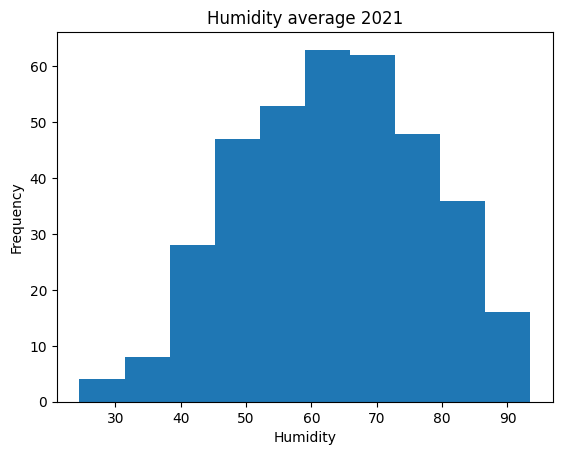

In [54]:
plt.hist(weather_df['Hum_avg']);
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity average 2021');

### Temperature

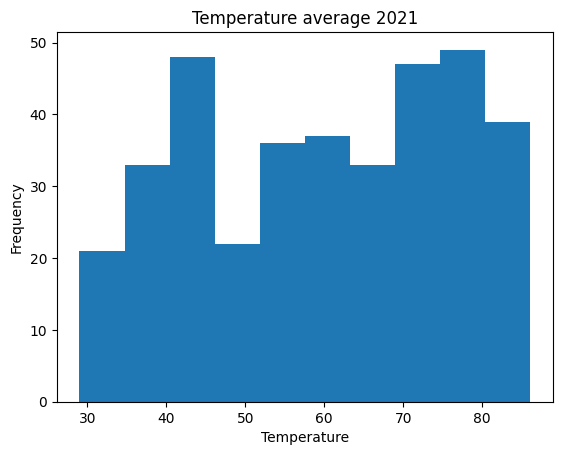

In [55]:
plt.hist(weather_df['Temp_avg']);
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature average 2021');

## Part 6: Line Plot

The trends can be drawn in one sibgle plot but as they do not have the same type and scale, the plot will not have much meaning. Plotting both trends in a single plot, will result a relatively straight line at the buttom of the plot. So I have decided to draw the plots side by side. This way they can be compared much easier. 

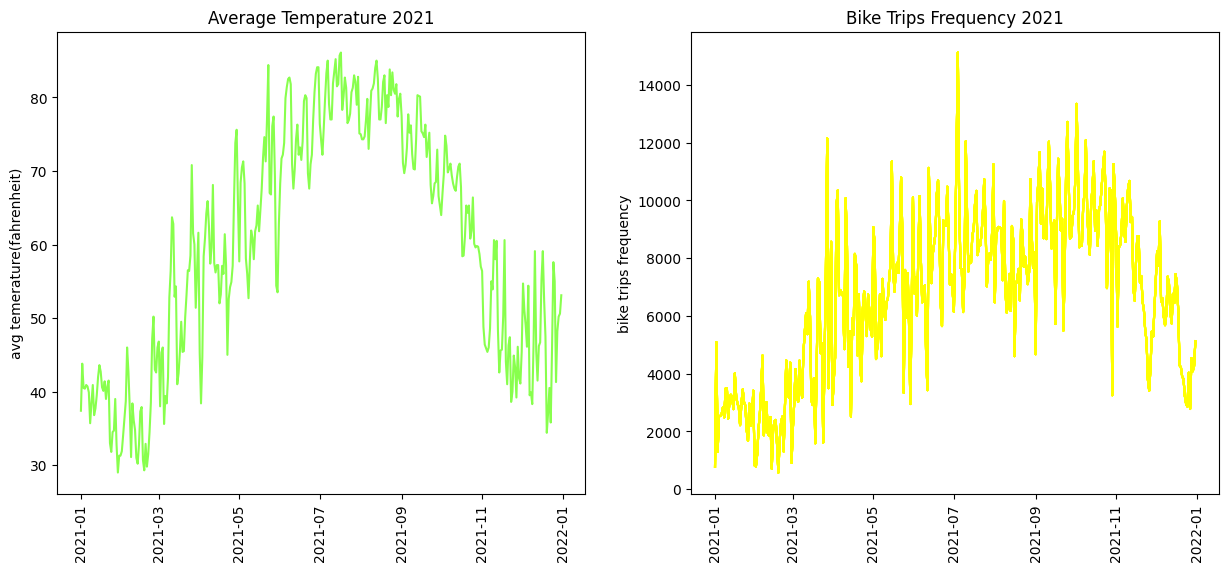

In [62]:
bike_count = bike_df.groupby([bike_df['Date']]).agg(len)
plt.figure(figsize=(15,6))

#series1 = plt.plot(weather_df.set_index('Date')['Temp_avg'], label = 'average temperature', color='#88ff4d')
plt.subplot(1,2,1)
plt.plot(weather_df.set_index('Date')['Temp_avg'], color='#88ff4d')
plt.xticks(rotation=90);
plt.ylabel('avg temerature(fahrenheit)')
plt.title('Average Temperature 2021')

#series2 = plt.plot(bike_count, label = 'bike use', color='yellow')
plt.subplot(1,2,2)
plt.plot(bike_count, color='yellow')
plt.ylabel('bike trips frequency')
plt.title('Bike Trips Frequency 2021')

#plt.legend(handles=[series2[0], series1[0]], loc=1)
plt.xticks(rotation=90);